Embedding = HugguingFaceEmbedding,
text splitter = RecursiveTextSplitter,
vector_store = ChromaDB

In [474]:
import pandas as pd
import matplotlib.pyplot as plt


In [475]:
metrics_llama3_8b = pd.read_csv('./Results/LLM-testing/Medium-articles-training/llama3-8b/result.csv')
metrics_mistral_7b = pd.read_csv('./Results/LLM-testing/Medium-articles-training/mistral-7b/result.csv')
metrics_phi3_14b = pd.read_csv('./Results/LLM-testing/Medium-articles-training/phi3-medium/ragas-metrics-data-phi3:medium.csv')

total_questions_llama3_8b = len(metrics_llama3_8b)
total_questions_mistral_7b = len(metrics_mistral_7b)
total_questions_phi3_14b = len(metrics_phi3_14b)

In [476]:
# plt.hist(data_1['faithfulness'], fc=(0,0,1,0.5))
# # plt.hist(data_2['faithfulness'],fc=(1,0,0,0.5))
# plt.legend(["chromaDB","Qdrant"])
# plt.title("faithfulness (llama3:8b)")

In [477]:
# plt.hist(data_1['answer_correctness'], fc=(0,0,1,0.5))
# # plt.hist(data_2['answer_correctness'],fc=(1,0,0,0.5))
# plt.legend(["chromaDB","Qdrant"])
# plt.title("answer_correctness (llama3:8b)")

In [478]:
# plt.hist(data_1['answer_relevancy'], fc=(0,0,1,0.5))
# # plt.hist(data_2['answer_relevancy'],fc=(1,0,0,0.5))
# plt.legend(["chromaDB","Qdrant"])
# plt.title("answer_relevancy (llama3:8b)")

In [479]:
# data_1_non_neg_ans = data_1[~data_1['answer'].str.contains("I don't have an answer", case=False, na=False)]
# questions_answered = len(data_1_non_neg_ans)
# average_answer_relevancy = data_1_non_neg_ans['answer_relevancy'].mean()
# data_1_non_neg_ans = data_1_non_neg_ans.sort_values(by='question')
# plt.barh(data_1_non_neg_ans['question'] , data_1_non_neg_ans['answer_relevancy'], fc=(0,0,1,0.5))
# plt.xticks(rotation=90)

# stats_text = (
#     f"Total questions: {total_questions}\n"
#     f"Questions answered: {questions_answered}\n"
#     f"Average answer relevancy: {average_answer_relevancy:.2f}"
# )
# plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
# plt.legend(["llama3:8b"])
# plt.title("Answer Relevancy when answer is non negative")

Text(0.5, 1.0, 'Answer Relevancy when ground_truth is non negative')

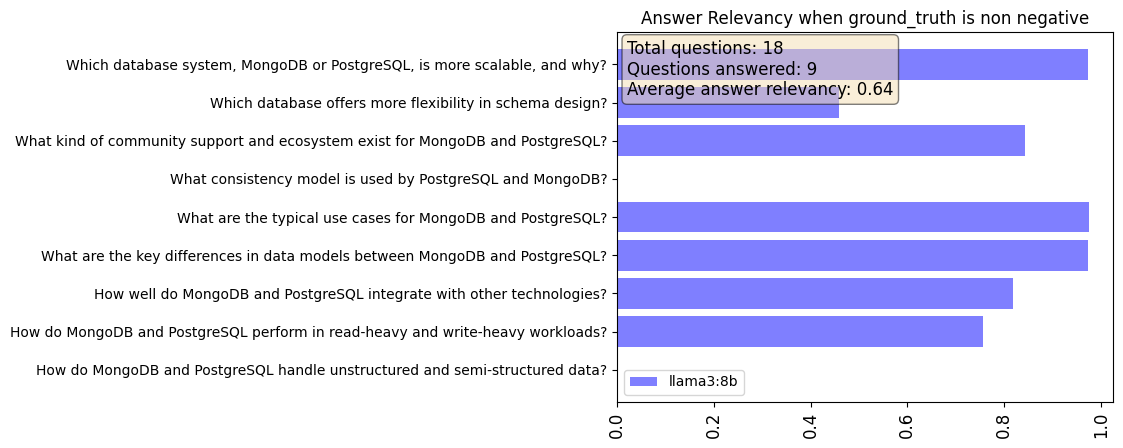

In [480]:
metrics_llama3_non_neg_gt = metrics_llama3_8b[~metrics_llama3_8b['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(metrics_llama3_non_neg_gt)
average_answer_relevancy = metrics_llama3_non_neg_gt['answer_relevancy'].mean()
metrics_llama3_non_neg_gt = metrics_llama3_non_neg_gt.sort_values(by='question')
plt.barh(metrics_llama3_non_neg_gt['question'] , metrics_llama3_non_neg_gt['answer_relevancy'], fc=(0,0,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions_llama3_8b}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["llama3:8b"])
plt.title("Answer Relevancy when ground_truth is non negative")

Text(0.5, 1.0, 'Answer Relevancy when answer is non negative')

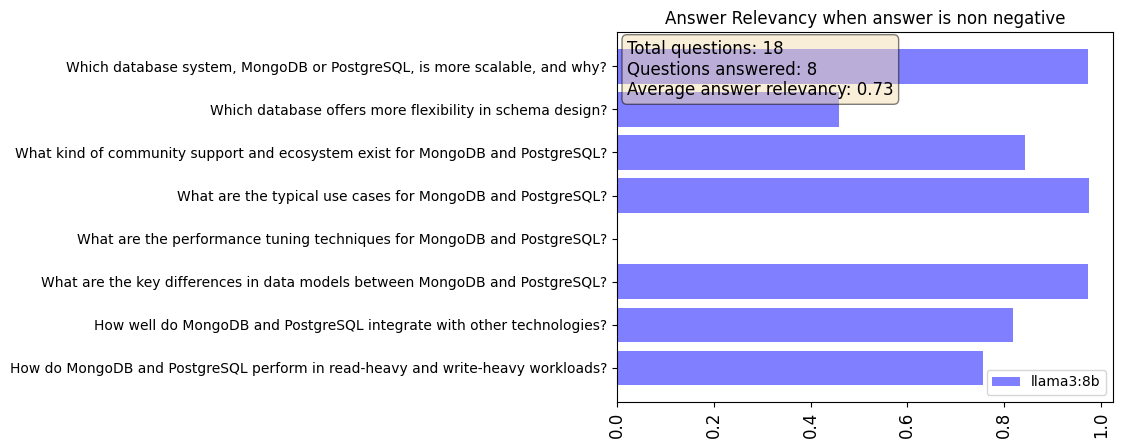

In [481]:
metrics_llama3_non_neg_gt = metrics_llama3_8b[~metrics_llama3_8b['answer'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(metrics_llama3_non_neg_gt)
average_answer_relevancy = metrics_llama3_non_neg_gt['answer_relevancy'].mean()
metrics_llama3_non_neg_gt = metrics_llama3_non_neg_gt.sort_values(by='question')
plt.barh(metrics_llama3_non_neg_gt['question'] , metrics_llama3_non_neg_gt['answer_relevancy'], fc=(0,0,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions_llama3_8b}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["llama3:8b"])
plt.title("Answer Relevancy when answer is non negative")

Text(0.02, 0.98, 'FP: 5.56 %\nAccuracy: 94.44 %\n')

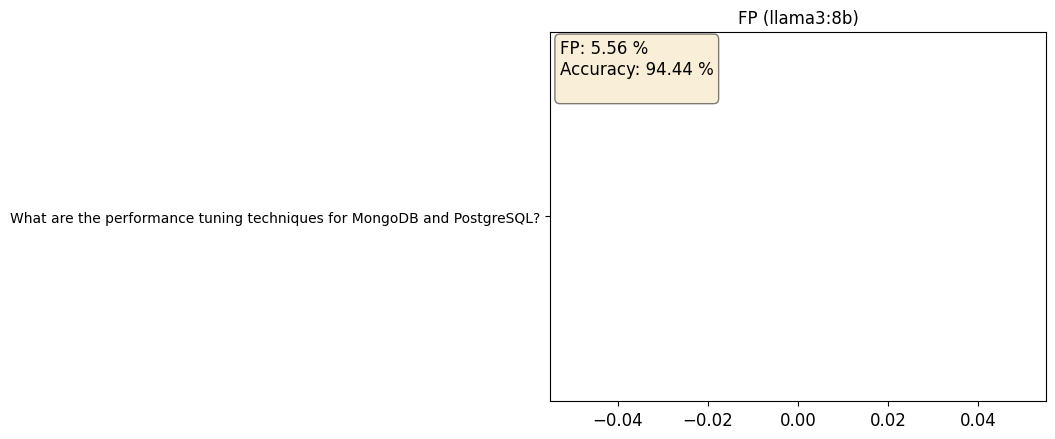

In [482]:
# Filter to keep rows where the ground_truth column contains "I don't have an answer"
fp_candidates = metrics_llama3_8b[metrics_llama3_8b['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]

# Further filter to get rows where answer does not contain "I don't have an answer"
fp = fp_candidates[~fp_candidates['answer'].str.contains("I don't have an answer", case=False, na=False)]

# Display the False Positives (questions where ground_truth says "I don't have an answer" but the answer has some content)
plt.barh(fp['question'] , fp['answer_relevancy'], fc=(0,0,1,0.5))
plt.title("FP (llama3:8b)")
fp_percentage = (len(fp)/total_questions_llama3_8b)* 100
stats_text = (
    f"FP: {fp_percentage:.2f} %\n"
    f"Accuracy: {100 - fp_percentage:.2f} %\n"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

Text(0.5, 1.0, 'Answer Relevancy when ground_truth is non negative')

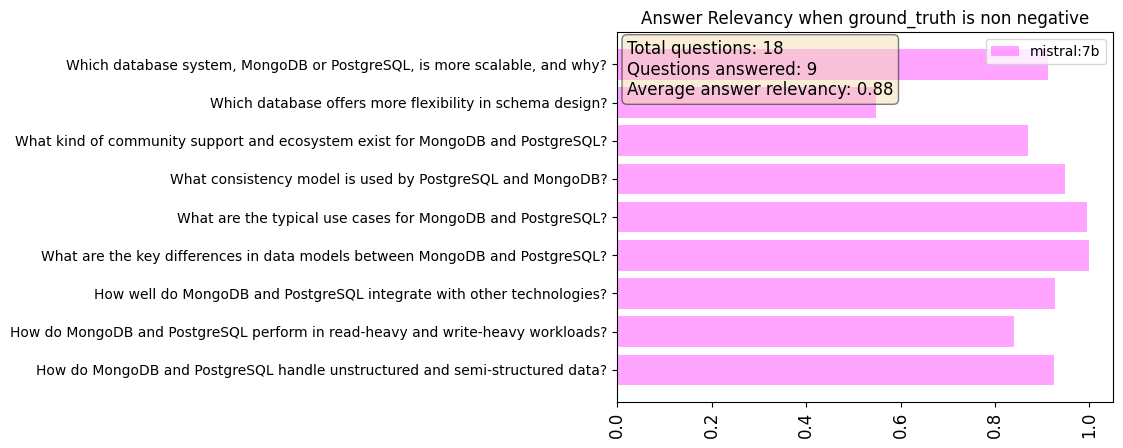

In [483]:
metrics_mistral_non_neg_gt = metrics_mistral_7b[~metrics_mistral_7b['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(metrics_mistral_non_neg_gt)
average_answer_relevancy = metrics_mistral_non_neg_gt['answer_relevancy'].mean()
metrics_mistral_non_neg_gt = metrics_mistral_non_neg_gt.sort_values(by='question')
plt.barh(metrics_mistral_non_neg_gt['question'] , metrics_mistral_non_neg_gt['answer_relevancy'], fc=(1,0.3,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions_mistral_7b}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["mistral:7b"])
plt.title("Answer Relevancy when ground_truth is non negative")

Text(0.5, 1.0, 'Answer Relevancy when answer is non negative')

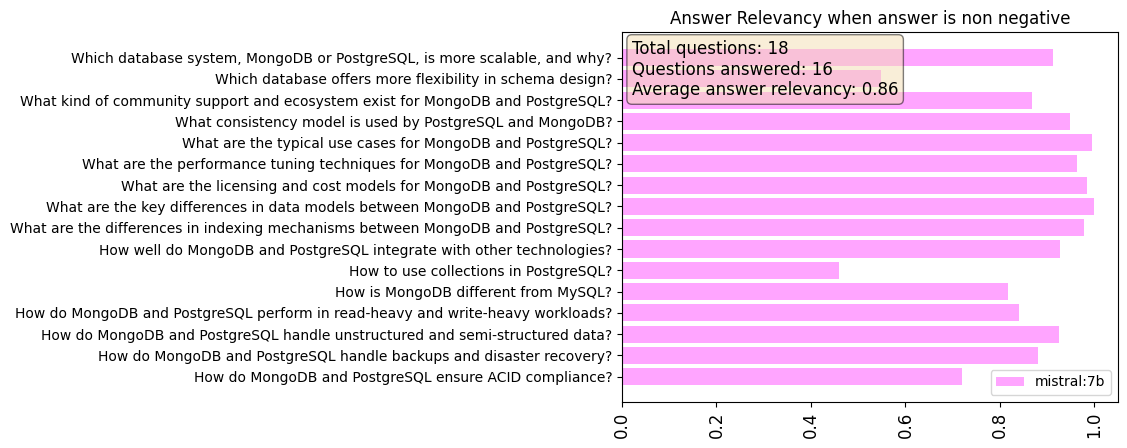

In [484]:
metrics_mistral_non_neg_gt = metrics_mistral_7b[~metrics_mistral_7b['answer'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(metrics_mistral_non_neg_gt)
average_answer_relevancy = metrics_mistral_non_neg_gt['answer_relevancy'].mean()
metrics_mistral_non_neg_gt = metrics_mistral_non_neg_gt.sort_values(by='question')
plt.barh(metrics_mistral_non_neg_gt['question'] , metrics_mistral_non_neg_gt['answer_relevancy'], fc=(1,0.3,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions_mistral_7b}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["mistral:7b"])
plt.title("Answer Relevancy when answer is non negative")

Text(0.02, 0.98, 'FP: 38.89 %\nAccuracy: 61.11 %\n')

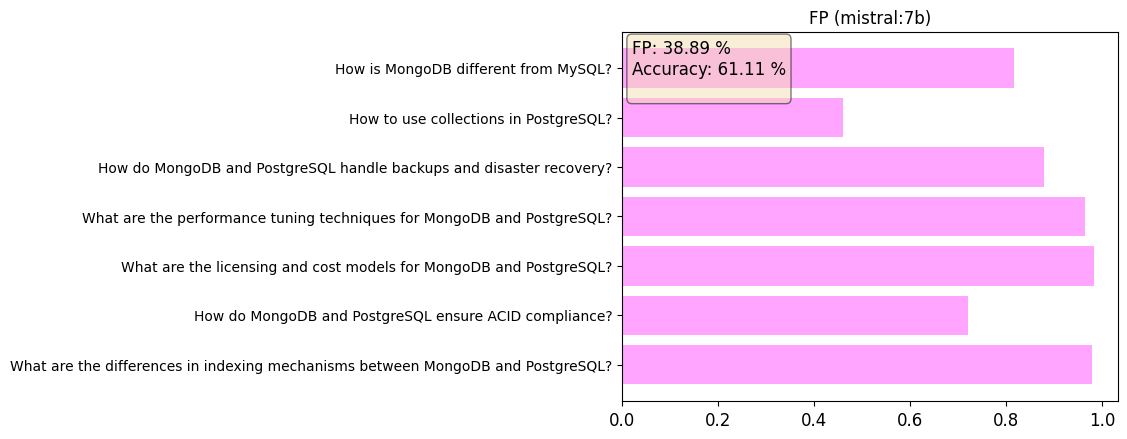

In [485]:
# Filter to keep rows where the ground_truth column contains "I don't have an answer"
fp_candidates = metrics_mistral_7b[metrics_mistral_7b['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]

# Further filter to get rows where answer does not contain "I don't have an answer"
fp = fp_candidates[~fp_candidates['answer'].str.contains("I don't have an answer", case=False, na=False)]

# Display the False Positives (questions where ground_truth says "I don't have an answer" but the answer has some content)
plt.barh(fp['question'] , fp['answer_relevancy'], fc=(1,0.3,1,0.5))
plt.title("FP (mistral:7b)")
fp_percentage = (len(fp)/total_questions_mistral_7b)* 100
stats_text = (
    f"FP: {fp_percentage:.2f} %\n"
    f"Accuracy: {100 - fp_percentage:.2f} %\n"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

Text(0.5, 1.0, 'Answer Relevancy when ground_truth is non negative')

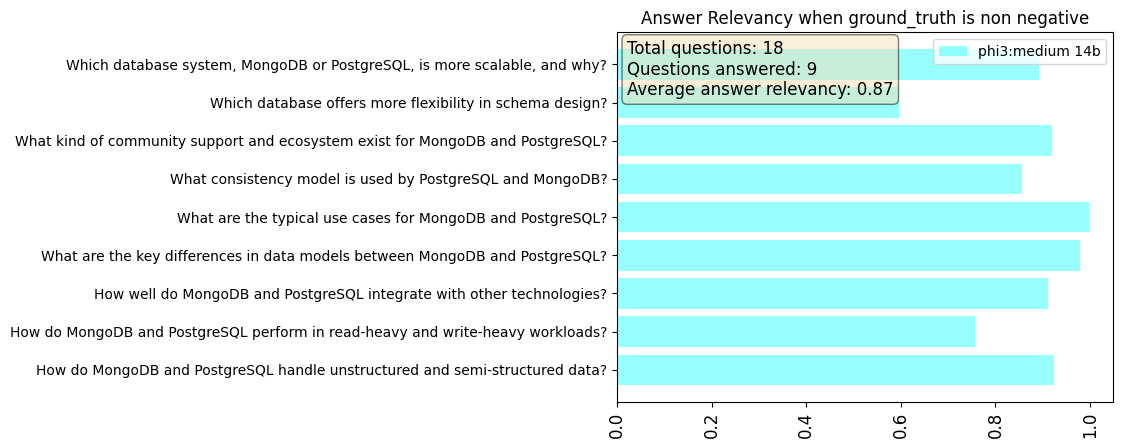

In [486]:
metrics_phi3_non_neg_gt = metrics_phi3_14b[~metrics_phi3_14b['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(metrics_phi3_non_neg_gt)
average_answer_relevancy = metrics_phi3_non_neg_gt['answer_relevancy'].mean()
metrics_phi3_non_neg_gt = metrics_phi3_non_neg_gt.sort_values(by='question')
plt.barh(metrics_phi3_non_neg_gt['question'] , metrics_phi3_non_neg_gt['answer_relevancy'], fc=(0.2,1,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions_llama3_8b}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["phi3:medium 14b"])
plt.title("Answer Relevancy when ground_truth is non negative")

Text(0.5, 1.0, 'Answer Relevancy when answer is non negative')

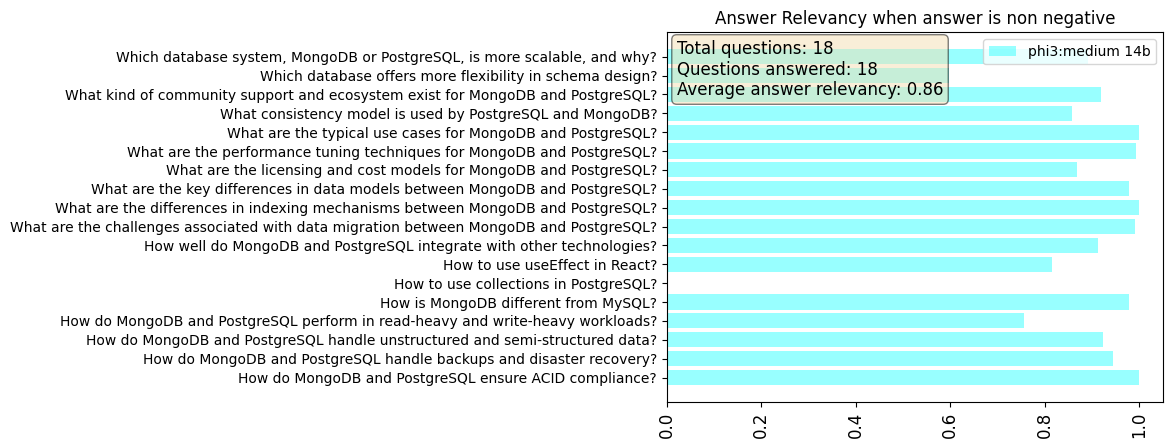

In [487]:
metrics_phi3_non_neg_gt = metrics_phi3_14b[~metrics_phi3_14b['answer'].str.contains("I don't have an answer", case=False, na=False)]
questions_answered = len(metrics_phi3_non_neg_gt)
average_answer_relevancy = metrics_phi3_non_neg_gt['answer_relevancy'].mean()
metrics_phi3_non_neg_gt = metrics_phi3_non_neg_gt.sort_values(by='question')
plt.barh(metrics_phi3_non_neg_gt['question'] , metrics_phi3_non_neg_gt['answer_relevancy'], fc=(0.2,1,1,0.5))
plt.xticks(rotation=90)

stats_text = (
    f"Total questions: {total_questions_llama3_8b}\n"
    f"Questions answered: {questions_answered}\n"
    f"Average answer relevancy: {average_answer_relevancy:.2f}"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend(["phi3:medium 14b"])
plt.title("Answer Relevancy when answer is non negative")

Text(0.02, 0.98, 'FP: 50.00 %\nAccuracy: 50.00 %\n')

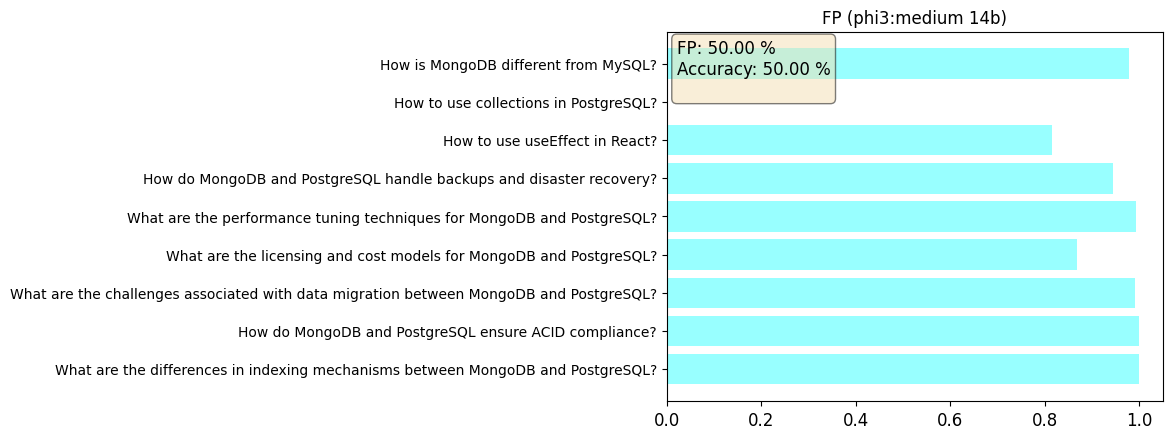

In [488]:
# Filter to keep rows where the ground_truth column contains "I don't have an answer"
fp_candidates = metrics_phi3_14b[metrics_phi3_14b['ground_truth'].str.contains("I don't have an answer", case=False, na=False)]

# Further filter to get rows where answer does not contain "I don't have an answer"
fp = fp_candidates[~fp_candidates['answer'].str.contains("I don't have an answer", case=False, na=False)]

# Display the False Positives (questions where ground_truth says "I don't have an answer" but the answer has some content)
plt.barh(fp['question'] , fp['answer_relevancy'], fc=(0.2,1,1,0.5))
plt.title("FP (phi3:medium 14b)")
fp_percentage = (len(fp)/total_questions_mistral_7b)* 100
stats_text = (
    f"FP: {fp_percentage:.2f} %\n"
    f"Accuracy: {100 - fp_percentage:.2f} %\n"
)
plt.gca().text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))